In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp
import time

__Question 1__    
for 1 number in final matrix, a row(k elements) in 1st matrix is multiplied to the column(k elements) in 2nd => k multiplications  
also k multiplied numbers are added together => k-1 additions  
final matrix contains m.n numbers => **m.n.k multiplications** and **m.n.(k-1) additions**


__Question 2__

In [2]:
np.random.seed(0)
a = np.random.randint(100, size = (3,5))
b = np.random.randint(100, size = (5,4))
print(a)
print("-----------------")
print(b)

[[44 47 64 67 67]
 [ 9 83 21 36 87]
 [70 88 88 12 58]]
-----------------
[[65 39 87 46]
 [88 81 37 25]
 [77 72  9 20]
 [80 69 79 47]
 [64 82 99 88]]


In [3]:
def matrixmulti(A,B,n,k,m):
    C = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i,j] += A[i,l]*B[l,j]
    return C


print(np.dot(a,b))
print(matrixmulti(a,b,3,5,4))

[[21572 20248 18069 13524]
 [17954 18204 15500 12257]
 [23742 21778 16828 12848]]
[[21572. 20248. 18069. 13524.]
 [17954. 18204. 15500. 12257.]
 [23742. 21778. 16828. 12848.]]


In [4]:
%timeit np.dot(a,b)

%timeit matrixmulti(a,b,3,5,4)

3.27 µs ± 182 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
99.7 µs ± 41.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


multiplication is faster when using numpy because our method uses loops to and operates element by element while numpy uses vector operations.

__Question 3__

In [5]:
np.random.seed(1)
e = np.random.randint(100,size =9)
e

array([37, 12, 72,  9, 75,  5, 79, 64, 16])

median in the middle number or avg. of middle number in sorted array.
for n= odd n+1//2 th no.
for n = even avg. of n//2 and n//2+1 th no.
would be the median and so we would need at most n//2 +1 passes  
one pass = O(n), so for n//2 +1 passes time complexity = O(n**2)

better method would be first sorting the array and then picking up the middle element


In [6]:
def max(arr):
    max_ind = 0 
    for i in range(len(arr)) :
        if(arr[i] > arr[max_ind]) :
            max_ind = i
    return max_ind
            
def findMedian(arr) :
    n = len(arr)
    for i in range((n-1)//2) :
        max_ind = max(arr)
        arr[max_ind] = - 10**9

    if(n%2 == 1) :
        median = arr[max(arr)] 
    else :
        max1 = max(arr)
        arr[max1] = - 10**9
        max2 = max(arr)
        median = (arr[max1] + arr[max2])/2
    
    return median

In [7]:
print(findMedian(np.copy(e)))

37


In [8]:
def median_bysort(arr):
    sorted_arr = np.sort(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1 = sorted_arr[n // 2 - 1]
        mid2 = sorted_arr[n // 2]
        return (mid1 + mid2) / 2

print(median_bysort(e))
print(np.median(e))

37
37.0


In [9]:
%timeit np.median(e)

51 µs ± 9.41 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%timeit median_bysort(e)

5.07 µs ± 667 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%timeit findMedian(np.copy(e))

39.5 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


__Question 4__

$F = x^2y + y^3 sin(x)$  
$\frac{dF}{dx} = 2xy + y^3 cos(x)$  
$\frac{dF}{dy} = x^2 + 3y^2 sin(x)$  

__Question 6__


In [12]:
x, y = smp.symbols('x y')
func = x**2*y + y**3*smp.sin(x)
grad = [smp.diff(func, var) for var in (x, y)]
grad

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]

__Question 7__


In [13]:
student = {
    2022:{
        "CS":{
            "student1": {
                'Roll Number': 1,
                'Name': 'A',
                'Marks': {'Maths': 100, 'English': 70}},
            "student2": {
                'Roll Number': 2,
                'Name': 'B',
                'Marks': {'Maths': 60, 'English': 50}}
        },
        "elec":{
            "student1": {
                'Roll Number': 3,
                'Name': 'C',
                'Marks': {'Maths': 80, 'English': 80}}
        }
          },
    2023:{
        "CS":{
            "student1": {
                'Roll Number': 4,
                'Name': 'D',
                'Marks': {'Maths': 90, 'English': 60}}
        }
    }
}

print("Student Record: ")
print(student)

Student Record: 
{2022: {'CS': {'student1': {'Roll Number': 1, 'Name': 'A', 'Marks': {'Maths': 100, 'English': 70}}, 'student2': {'Roll Number': 2, 'Name': 'B', 'Marks': {'Maths': 60, 'English': 50}}}, 'elec': {'student1': {'Roll Number': 3, 'Name': 'C', 'Marks': {'Maths': 80, 'English': 80}}}}, 2023: {'CS': {'student1': {'Roll Number': 4, 'Name': 'D', 'Marks': {'Maths': 90, 'English': 60}}}}}


__Question 8__


In [14]:
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

    def __str__(self):
        return f"Roll Number: {self.roll_no}, Name: {self.name}, Marks: {self.marks}"


class Branch:
    def __init__(self, name, studs):
        self.name = name
        self.studs = studs

    def __str__(self):
        stud_info = "\n".join(str(stud) for stud in self.studs)
        return f"{self.name}\n{stud_info}"


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

    def __str__(self):
        branch_info = "\n".join(str(branch) for branch in self.branches)
        return f"{self.year}\n{branch_info}\n"

stud1 = Student(1, "A", {"Maths": 100, "English": 70})
stud2 = Student(2, "B", {"Maths": 60, "English": 50})
stud3 = Student(3, "C", {"Maths": 80, "English": 80})
stud4 = Student(4, "D", {"Maths": 90, "English": 60})

branch1 = Branch("CS", [stud1, stud2])
branch2 = Branch("elec", [stud3])
branch3 = Branch("CS", [stud4])

year2022 = Year(2022, [branch1, branch2])
year2023 = Year(2023, [branch3])


database = [year2022, year2023]
for year in database:
    print(year)
    

2022
CS
Roll Number: 1, Name: A, Marks: {'Maths': 100, 'English': 70}
Roll Number: 2, Name: B, Marks: {'Maths': 60, 'English': 50}
elec
Roll Number: 3, Name: C, Marks: {'Maths': 80, 'English': 80}

2023
CS
Roll Number: 4, Name: D, Marks: {'Maths': 90, 'English': 60}



__Question 9__


In [15]:
x= np.arange(0.5,100.5,0.5)

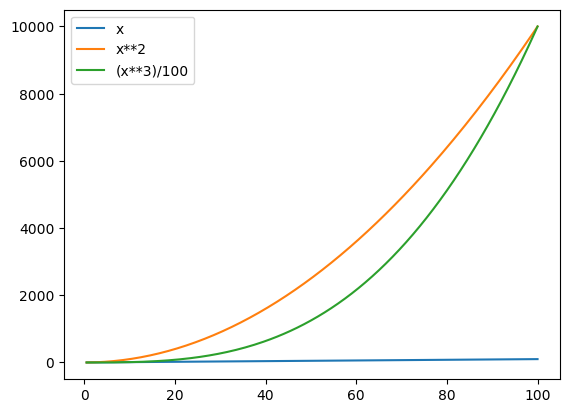

In [16]:
plt.plot(x,x, label = "x")
plt.plot(x,x**2, label = "x**2")
plt.plot(x,(x**3)/100, label = "(x**3)/100")
plt.legend()

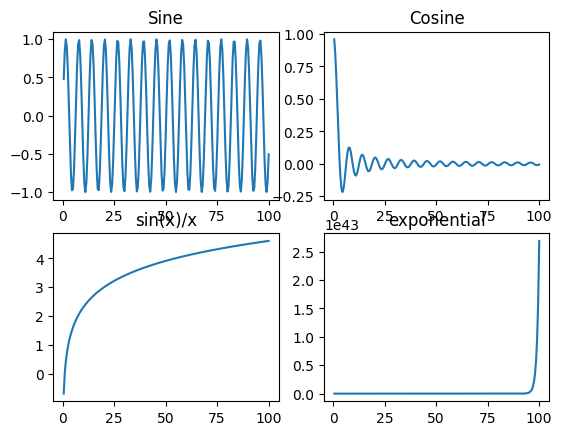

In [17]:
figure, axis = plt.subplots(2, 2) 

axis[0, 0].plot(x,np.sin(x))
axis[0, 0].set_title("Sine") 

axis[0, 1].plot(x,(np.sin(x))/x) 
axis[0, 1].set_title("Cosine") 

axis[1, 0].plot(x, np.log(x))
axis[1, 0].set_title("sin(x)/x") 

axis[1, 1].plot(x, np.exp(x)) 
axis[1, 1].set_title("exponential") 

plt.show() 

__Question 10__

In [18]:
np.random.seed(0)
Matrix = np.random.uniform(1,2,size = (20,5))
df = pd.DataFrame(Matrix, columns = ['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,1.548814,1.715189,1.602763,1.544883,1.423655
1,1.645894,1.437587,1.891773,1.963663,1.383442
2,1.791725,1.528895,1.568045,1.925597,1.071036
3,1.087129,1.020218,1.832620,1.778157,1.870012
4,1.978618,1.799159,1.461479,1.780529,1.118274


In [19]:
col = df.std().idxmax()
row = df.mean(axis = 1).idxmin()
print(row)
print(col)

15
c


__Question 11__

In [20]:
df['f'] = df.sum(axis = 1)
df['g'] = np.where(df['f'] < 8, "LT8","GT8")
df.head()

,a,b,c,d,e,f,g
0,1.548814,1.715189,1.602763,1.544883,1.423655,7.835304,LT8
1,1.645894,1.437587,1.891773,1.963663,1.383442,8.322359,GT8
2,1.791725,1.528895,1.568045,1.925597,1.071036,7.885297,LT8
3,1.087129,1.020218,1.832620,1.778157,1.870012,7.588136,LT8
4,1.978618,1.799159,1.461479,1.780529,1.118274,8.138060,GT8


In [21]:
print(len(df[df['g'] == "LT8"]))

print((df[df['g'] == "LT8"])['f'].std())

print((df[df['g'] == "GT8"])['f'].std())

16
0.555075090573796
0.2654357309476843


__Question 12__

In [22]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

b = np.array([7, 8, 9])
a + b


array([[ 8, 10, 12],
       [11, 13, 15]])

In [23]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

b = 3
a + b

array([[4, 5, 6],
       [7, 8, 9]])

In [24]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

b = np.array([1, 2, 3])
a * b

array([[ 1,  4,  9],
       [ 4, 10, 18]])

__Question 13__

In [25]:
np.random.seed(0)
z = np.random.randint(100,size =10)
print(z)
                      
def min_ind(arr):
    n = len(arr)
    min_in = 0
    for i in range(n):
        if arr[i] < arr[min_in]:
            min_in = i
    return min_in

print(min_ind(z))
print(np.argmin(z))

[44 47 64 67 67  9 83 21 36 87]
5
5
